In [75]:
print('bismillah')

bismillah


In [76]:
import pandas as pd
df = pd.read_csv('emi_prediction_dataset.csv')

C:\Users\Tasneem Inayath\AppData\Local\Temp\ipykernel_12760\1350229207.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('emi_prediction_dataset.csv')


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     404800 non-null  object 
 1   gender                  404800 non-null  object 
 2   marital_status          404800 non-null  object 
 3   education               402396 non-null  object 
 4   monthly_salary          404800 non-null  object 
 5   employment_type         404800 non-null  object 
 6   years_of_employment     404800 non-null  float64
 7   company_type            404800 non-null  object 
 8   house_type              404800 non-null  object 
 9   monthly_rent            402374 non-null  float64
 10  family_size             404800 non-null  int64  
 11  dependents              404800 non-null  int64  
 12  school_fees             404800 non-null  float64
 13  college_fees            404800 non-null  float64
 14  travel_expenses     

In [78]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['monthly_salary']=pd.to_numeric(df['monthly_salary'], errors='coerce')
df['bank_balance']=pd.to_numeric(df['bank_balance'], errors='coerce')

In [79]:
df['monthly_rent'].fillna(df['monthly_rent'].mean(), inplace=True)
df['credit_score'].fillna(df['credit_score'].mean(), inplace=True)
df['age'].fillna(df['age'].mean(), inplace=True)

C:\Users\Tasneem Inayath\AppData\Local\Temp\ipykernel_12760\1826670420.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['monthly_rent'].fillna(df['monthly_rent'].mean(), inplace=True)
C:\Users\Tasneem Inayath\AppData\Local\Temp\ipykernel_12760\1826670420.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

In [80]:
df.isna().sum()

age                          0
gender                       0
marital_status               0
education                 2404
monthly_salary            1993
employment_type              0
years_of_employment          0
company_type                 0
house_type                   0
monthly_rent                 0
family_size                  0
dependents                   0
school_fees                  0
college_fees                 0
travel_expenses              0
groceries_utilities          0
other_monthly_expenses       0
existing_loans               0
current_emi_amount           0
credit_score                 0
bank_balance              4392
emergency_fund            2351
emi_scenario                 0
requested_amount             0
requested_tenure             0
emi_eligibility              0
max_monthly_emi              0
dtype: int64

In [81]:
categorical_cols = ['gender','marital_status','education','employment_type',
                    'company_type','house_type','existing_loans',
                    'emi_scenario','emi_eligibility']
for col in categorical_cols:
    df[col] = df[col].astype('category')


In [82]:
# Fill missing categorical with mode
df['education'].fillna(df['education'].mode()[0], inplace=True)


C:\Users\Tasneem Inayath\AppData\Local\Temp\ipykernel_12760\3054707266.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education'].fillna(df['education'].mode()[0], inplace=True)


In [83]:
df['monthly_salary'] = pd.to_numeric(df['monthly_salary'], errors='coerce')
df['bank_balance'] = pd.to_numeric(df['bank_balance'], errors='coerce')
df['emergency_fund'] = pd.to_numeric(df['emergency_fund'], errors='coerce')

In [84]:
df['monthly_salary'] = pd.to_numeric(df['monthly_salary'], errors='coerce')
df['monthly_salary'] = df.groupby('employment_type')['monthly_salary'].transform(
    lambda x: x.fillna(x.median())
)
df['bank_balance'] = pd.to_numeric(df['bank_balance'], errors='coerce')
df['bank_balance'] = df.groupby(pd.cut(df['monthly_salary'], bins=5))['bank_balance'].transform(
    lambda x: x.fillna(x.median())
)
df['emergency_fund'] = df.groupby('family_size')['emergency_fund'].transform(
    lambda x: x.fillna(x.median())
)

C:\Users\Tasneem Inayath\AppData\Local\Temp\ipykernel_12760\2264609781.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['monthly_salary'] = df.groupby('employment_type')['monthly_salary'].transform(
C:\Users\Tasneem Inayath\AppData\Local\Temp\ipykernel_12760\2264609781.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['bank_balance'] = df.groupby(pd.cut(df['monthly_salary'], bins=5))['bank_balance'].transform(


In [85]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['monthly_salary'] = pd.to_numeric(df['monthly_salary'], errors='coerce')
df['bank_balance'] = pd.to_numeric(df['bank_balance'], errors='coerce')
df['gender'] = df['gender'].astype('category')

In [86]:
df.drop_duplicates(inplace=True)

In [87]:
object_cols = df.select_dtypes(include='object').columns
print(object_cols)

Index([], dtype='object')


In [89]:
# Standardize gender values
df['gender'] = df['gender'].str.strip().str.upper()  # remove spaces, make uppercase

# Map all variants to consistent labels
gender_map = {
    'F': 'Female', 'FEMALE': 'Female', 'female': 'Female', 'Female': 'Female',
    'M': 'Male', 'MALE': 'Male', 'male': 'Male', 'Male': 'Male'
}
df['gender'] = df['gender'].map(gender_map)

# Check cleaned values
print(df['gender'].unique())

['Female' 'Male']


In [90]:
for col in ['gender','marital_status','education','employment_type','emi_eligibility']:
    print(col, df[col].unique())

gender ['Female' 'Male']
marital_status ['Married', 'Single']
Categories (2, object): ['Married', 'Single']
education ['Professional', 'Graduate', 'High School', 'Post Graduate']
Categories (4, object): ['Graduate', 'High School', 'Post Graduate', 'Professional']
employment_type ['Private', 'Government', 'Self-employed']
Categories (3, object): ['Government', 'Private', 'Self-employed']
emi_eligibility ['Not_Eligible', 'Eligible', 'High_Risk']
Categories (3, object): ['Eligible', 'High_Risk', 'Not_Eligible']


In [91]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
print(df[numeric_cols].describe())

                 age  monthly_salary  years_of_employment   monthly_rent  \
count  404800.000000   404800.000000        404800.000000  404800.000000   
mean       38.875832    59470.723612             5.364079    5828.446490   
std         9.303538    43284.838700             6.079135    8622.649726   
min        26.000000     3967.000000             0.500000       0.000000   
25%        32.000000    35400.000000             1.200000       0.000000   
50%        38.000000    51700.000000             3.200000       0.000000   
75%        48.000000    72800.000000             7.200000   10600.000000   
max        59.000000   499970.000000            36.000000   80000.000000   

         family_size     dependents    school_fees   college_fees  \
count  404800.000000  404800.000000  404800.000000  404800.000000   
mean        2.940425       1.940425    4624.575593    4066.253706   
std         1.075199       1.075199    5061.074401    7319.344289   
min         1.000000       0.000000    

In [92]:
import pandas as pd

# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Columns to check
outlier_cols = [
    'monthly_salary','monthly_rent','school_fees','college_fees',
    'travel_expenses','groceries_utilities','other_monthly_expenses',
    'current_emi_amount','bank_balance','emergency_fund',
    'requested_amount','max_monthly_emi'
]

# Run detection
outlier_report = {}
for col in outlier_cols:
    outliers, lb, ub = detect_outliers_iqr(df, col)
    outlier_report[col] = {
        'outlier_count': len(outliers),
        'lower_bound': lb,
        'upper_bound': ub,
        'min_value': df[col].min(),
        'max_value': df[col].max()
    }

# Convert to DataFrame for easy viewing
outlier_summary = pd.DataFrame(outlier_report).T
print(outlier_summary)

# Special case: Credit Score
invalid_credit = df[(df['credit_score'] < 300) | (df['credit_score'] > 850)]
print("Invalid credit scores:", len(invalid_credit))

                        outlier_count  lower_bound  upper_bound  min_value  \
monthly_salary                12304.0     -20700.0     128900.0     3967.0   
monthly_rent                  12720.0     -15900.0      26500.0        0.0   
school_fees                       0.0     -13500.0      22500.0        0.0   
college_fees                  48000.0      -9750.0      16250.0        0.0   
travel_expenses               12465.0      -3100.0      13700.0      600.0   
groceries_utilities           11774.0      -5350.0      29450.0     1800.0   
other_monthly_expenses        13518.0      -4450.0      17550.0      600.0   
current_emi_amount            17351.0     -12000.0      20000.0        0.0   
bank_balance                  13380.0    -231450.0     666550.0     6100.0   
emergency_fund                17790.0     -98800.0     267600.0     1400.0   
requested_amount              25883.0    -431000.0    1049000.0    10000.0   
max_monthly_emi               17268.0     -13438.0      23730.0 

In [93]:
import numpy as np

def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    return df


# Columns with outliers
outlier_cols = [
    'monthly_salary','monthly_rent','college_fees',
    'travel_expenses','groceries_utilities','other_monthly_expenses',
    'current_emi_amount','bank_balance','emergency_fund',
    'requested_amount','max_monthly_emi'
]

# Apply capping
for col in outlier_cols:
    df = cap_outliers(df, col)

In [94]:
df['credit_score'] = df['credit_score'].clip(lower=300, upper=850)

In [95]:
df.describe()

,age,monthly_salary,years_of_employment,monthly_rent,family_size,dependents,school_fees,college_fees,travel_expenses,groceries_utilities,other_monthly_expenses,current_emi_amount,credit_score,bank_balance,emergency_fund,requested_amount,requested_tenure,max_monthly_emi
count,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,4.048000e+05,404800.000000,404800.000000
mean,38.875832,56712.670662,5.364079,5620.083595,2.940425,1.940425,4624.575593,3544.510623,5604.851038,12655.704545,6998.585968,4291.417490,700.026880,236587.452940,93244.845603,3.563825e+05,29.126677,6440.632536
std,9.303538,28222.864177,6.079135,7944.233718,1.075199,1.075199,5061.074401,6126.585456,3126.040655,6519.203677,4123.465650,6236.883906,72.950567,167147.393412,70041.968868,3.081507e+05,18.100854,6648.852116
min,26.000000,3967.000000,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,600.000000,1800.000000,600.000000,0.000000,300.000000,6100.000000,1400.000000,1.000000e+04,3.000000,500.000000
25%,32.000000,35400.000000,1.200000,0.000000,2.000000,1.000000,0.000000,0.000000,3200.000000,7700.000000,3800.000000,0.000000,654.000000,105300.000000,38600.000000,1.240000e+05,15.000000,500.000000
50%,38.000000,51700.000000,3.200000,0.000000,3.000000,2.000000,3000.000000,0.000000,4900.000000,11400.000000,6000.000000,0.000000,700.856223,194100.000000,74100.000000,2.360000e+05,25.000000,4211.200000
75%,48.000000,72800.000000,7.200000,10600.000000,4.000000,3.000000,9000.000000,6500.000000,7400.000000,16400.000000,9300.000000,8000.000000,748.000000,329800.000000,130200.000000,4.940000e+05,40.000000,9792.000000
max,59.000000,128900.000000,36.000000,26500.000000,5.000000,4.000000,15000.000000,16250.000000,13700.000000,29450.000000,17550.000000,20000.000000,850.000000,666550.000000,267600.000000,1.049000e+06,84.000000,23730.000000


In [96]:
# Age vs years of employment
inconsistent_age_emp = df[df['years_of_employment'] > (df['age'] - 18)]

# Dependents vs family size
inconsistent_family = df[df['dependents'] > df['family_size']]

# Salary vs EMI
inconsistent_salary_emi = df[df['current_emi_amount'] > df['monthly_salary']]

# Requested amount vs max EMI
inconsistent_loan = df[df['requested_amount'] / df['requested_tenure'] > df['max_monthly_emi']]

print(inconsistent_age_emp, inconsistent_family, inconsistent_salary_emi, inconsistent_loan)

Empty DataFrame
Columns: [age, gender, marital_status, education, monthly_salary, employment_type, years_of_employment, company_type, house_type, monthly_rent, family_size, dependents, school_fees, college_fees, travel_expenses, groceries_utilities, other_monthly_expenses, existing_loans, current_emi_amount, credit_score, bank_balance, emergency_fund, emi_scenario, requested_amount, requested_tenure, emi_eligibility, max_monthly_emi]
Index: []

[0 rows x 27 columns] Empty DataFrame
Columns: [age, gender, marital_status, education, monthly_salary, employment_type, years_of_employment, company_type, house_type, monthly_rent, family_size, dependents, school_fees, college_fees, travel_expenses, groceries_utilities, other_monthly_expenses, existing_loans, current_emi_amount, credit_score, bank_balance, emergency_fund, emi_scenario, requested_amount, requested_tenure, emi_eligibility, max_monthly_emi]
Index: []

[0 rows x 27 columns]          age  gender marital_status      education  monthl

In [99]:
df.duplicated().sum()

np.int64(0)

In [98]:
df.drop_duplicates(inplace=True)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404764 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   age                     404764 non-null  float64 
 1   gender                  404764 non-null  object  
 2   marital_status          404764 non-null  category
 3   education               404764 non-null  category
 4   monthly_salary          404764 non-null  float64 
 5   employment_type         404764 non-null  category
 6   years_of_employment     404764 non-null  float64 
 7   company_type            404764 non-null  category
 8   house_type              404764 non-null  category
 9   monthly_rent            404764 non-null  float64 
 10  family_size             404764 non-null  int64   
 11  dependents              404764 non-null  int64   
 12  school_fees             404764 non-null  float64 
 13  college_fees            404764 non-null  float64 
 14  travel_ex

In [101]:
df.to_csv('emi_prediction_dataset_enhanced.csv', index=False)

In [102]:
categorical_cols = [
    'gender','marital_status','education','employment_type',
    'company_type','house_type','existing_loans','emi_scenario'
]
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

gender: ['Female' 'Male']
marital_status: ['Married', 'Single']
Categories (2, object): ['Married', 'Single']
education: ['Professional', 'Graduate', 'High School', 'Post Graduate']
Categories (4, object): ['Graduate', 'High School', 'Post Graduate', 'Professional']
employment_type: ['Private', 'Government', 'Self-employed']
Categories (3, object): ['Government', 'Private', 'Self-employed']
company_type: ['Mid-size', 'MNC', 'Startup', 'Large Indian', 'Small']
Categories (5, object): ['Large Indian', 'MNC', 'Mid-size', 'Small', 'Startup']
house_type: ['Rented', 'Family', 'Own']
Categories (3, object): ['Family', 'Own', 'Rented']
existing_loans: ['Yes', 'No']
Categories (2, object): ['No', 'Yes']
emi_scenario: ['Personal Loan EMI', 'E-commerce Shopping EMI', 'Education EMI', 'Vehicle EMI', 'Home Appliances EMI']
Categories (5, object): ['E-commerce Shopping EMI', 'Education EMI', 'Home Appliances EMI', 'Personal Loan EMI', 'Vehicle EMI']


eda

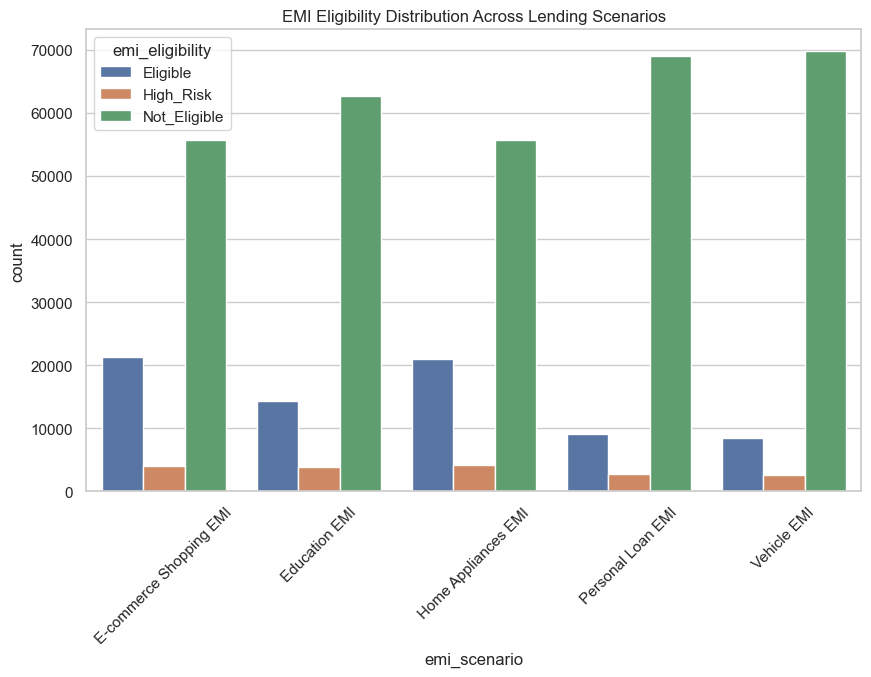

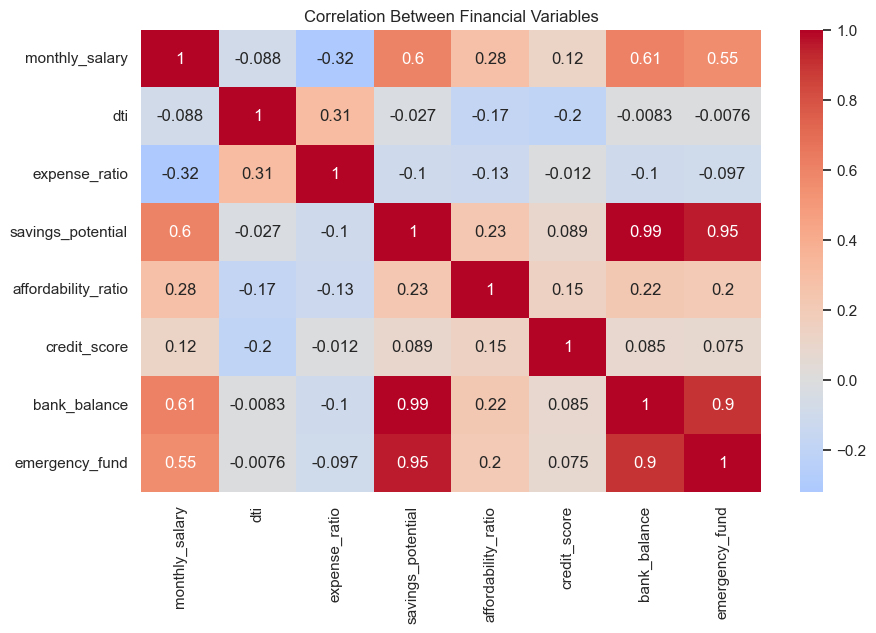

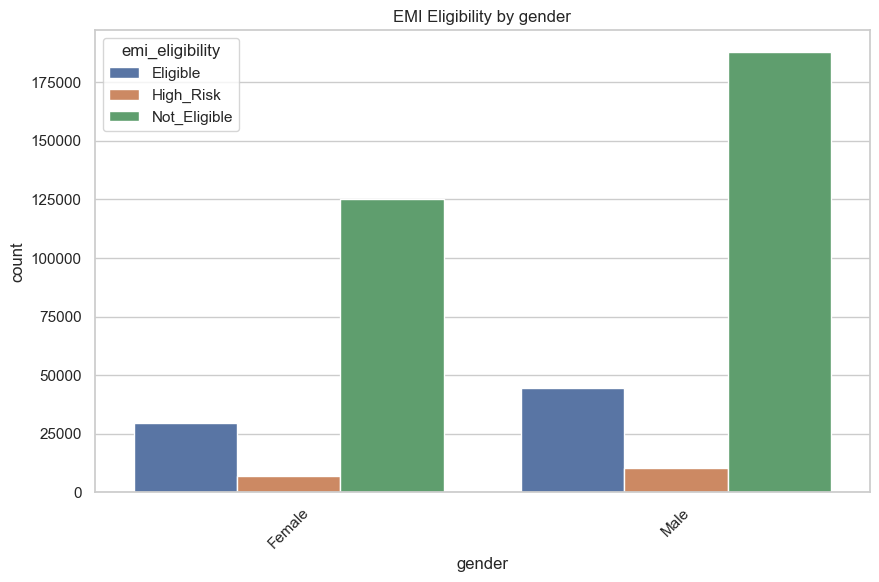

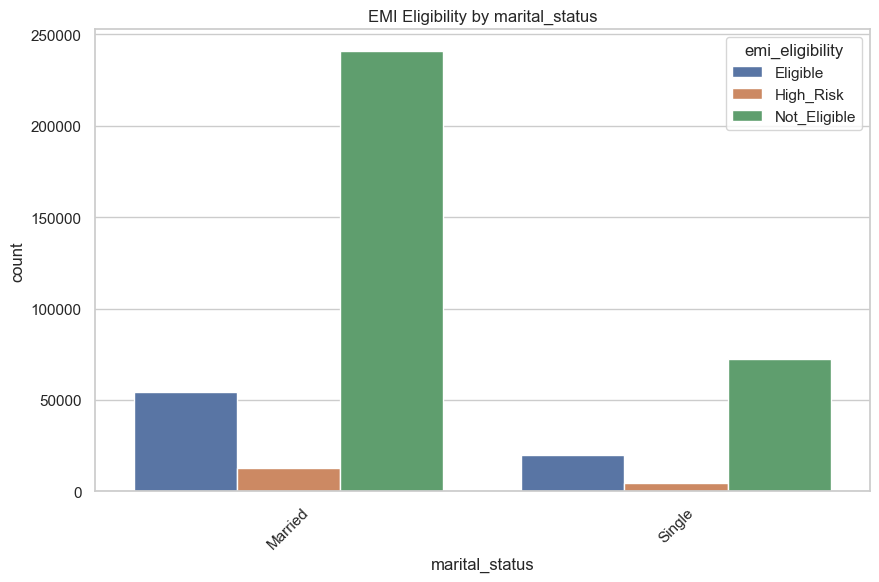

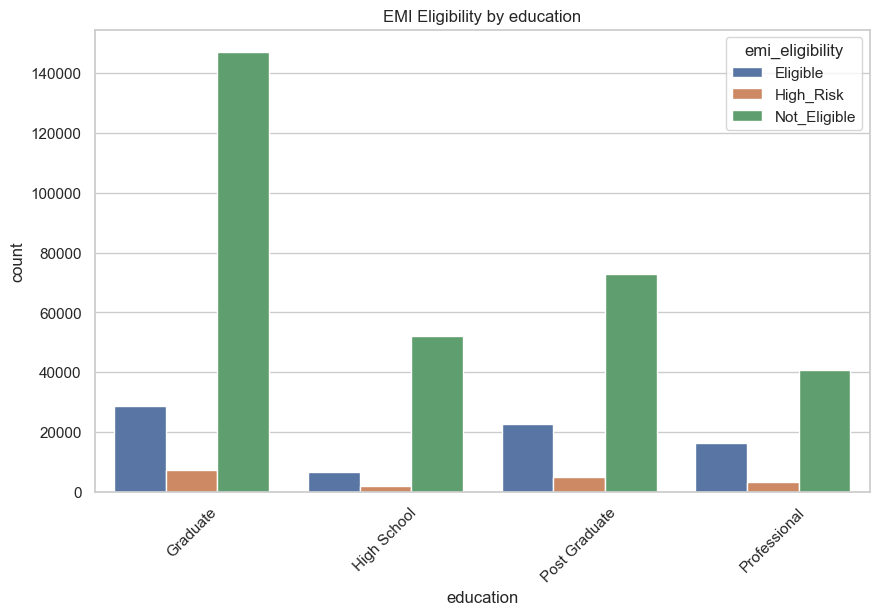

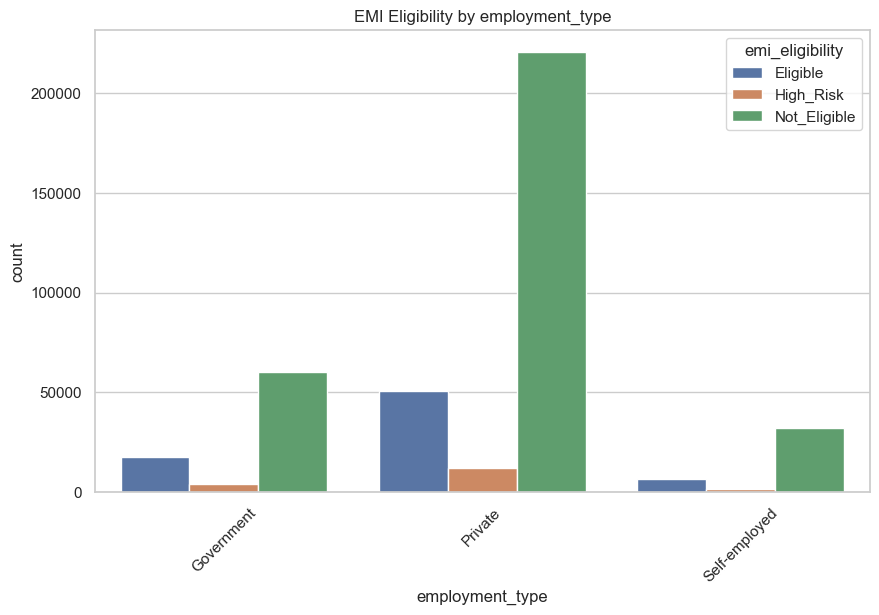

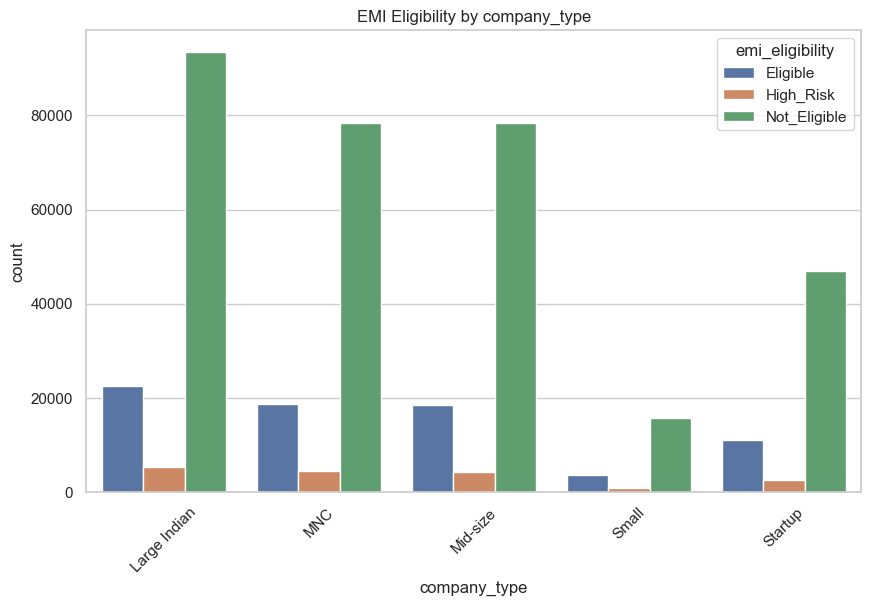

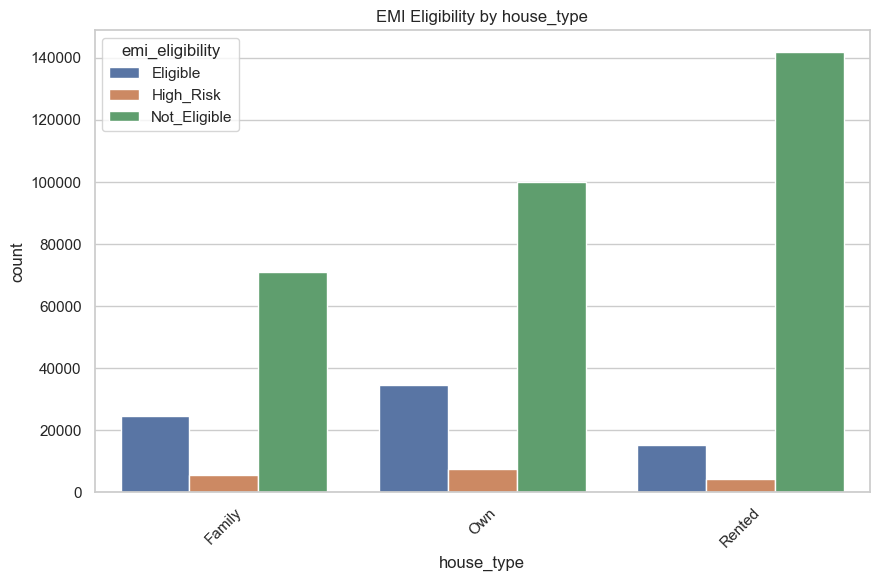

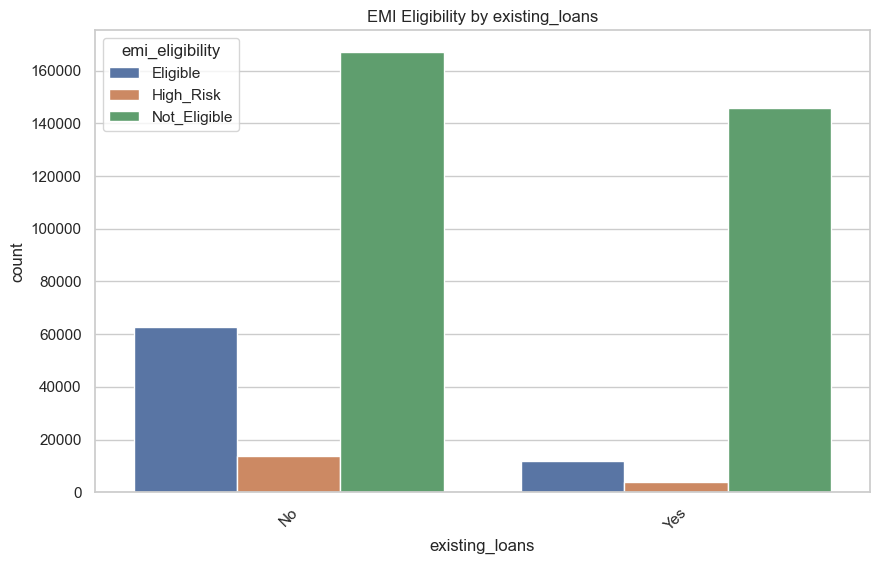

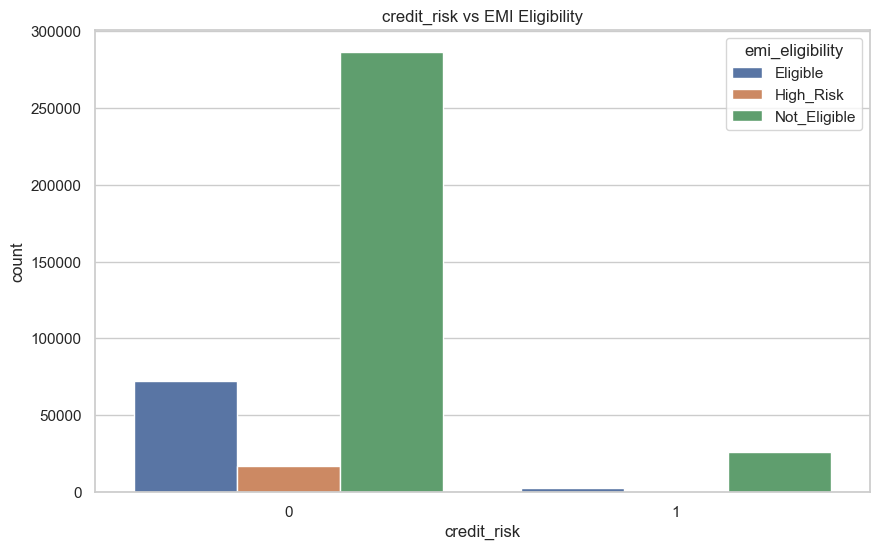

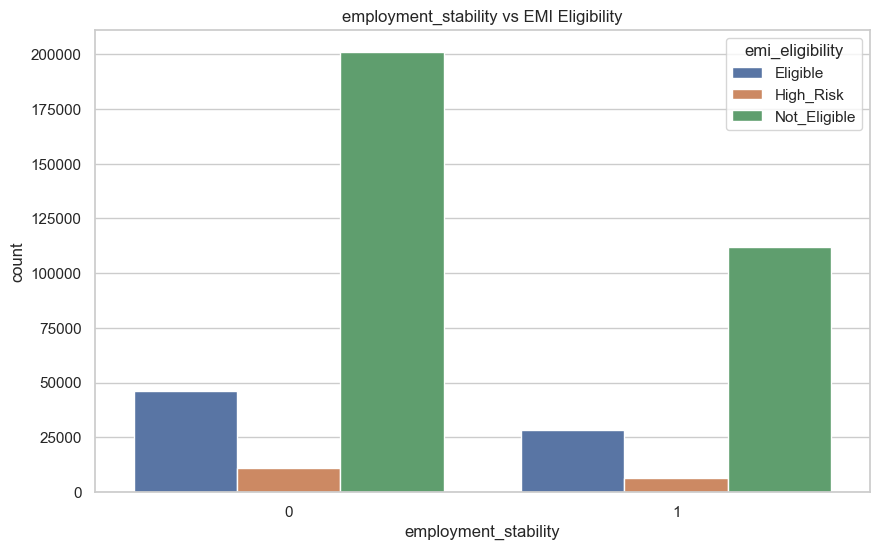

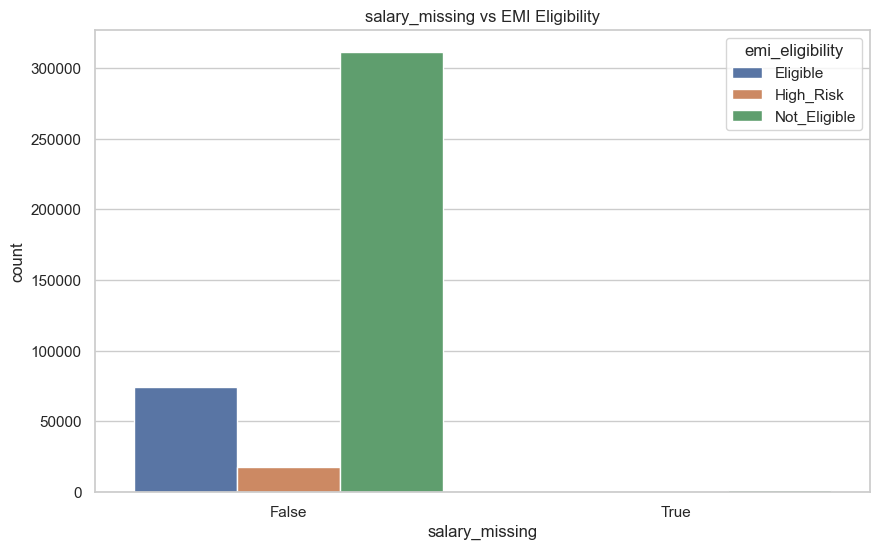

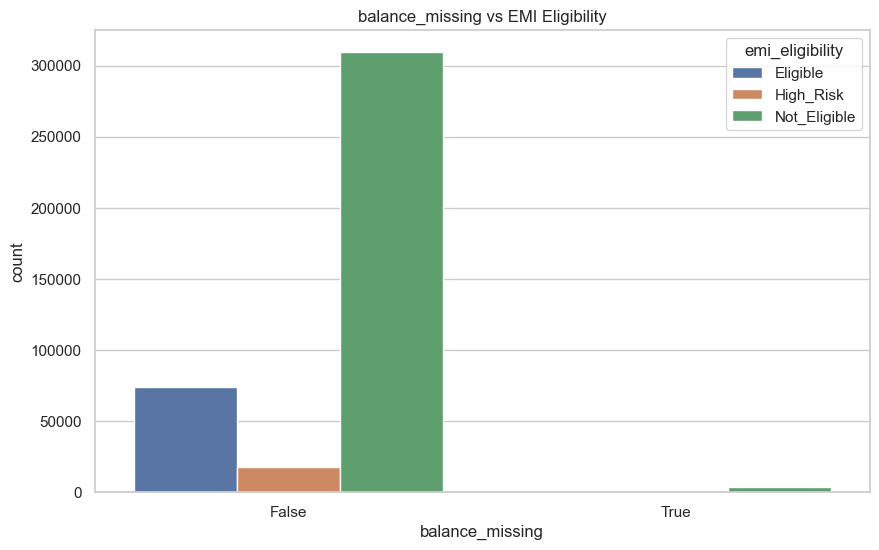

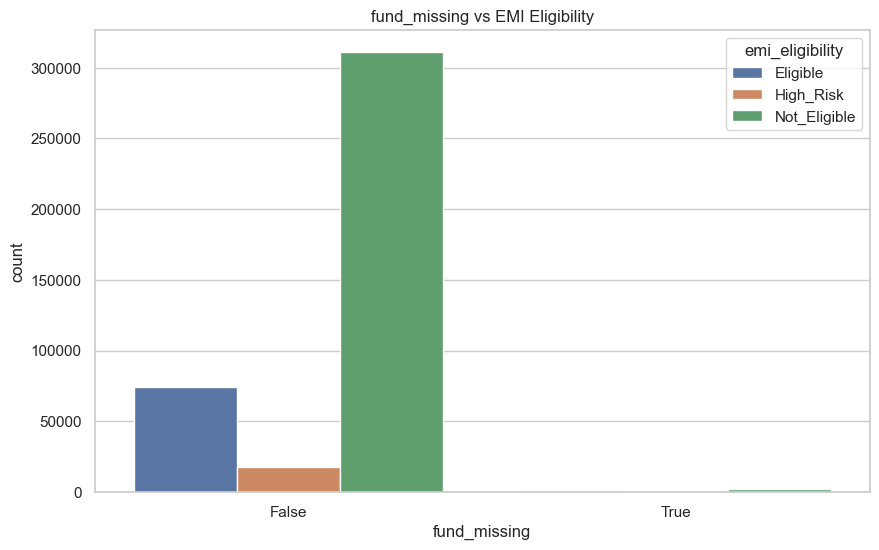

C:\Users\Tasneem Inayath\AppData\Local\Temp\ipykernel_28064\746902877.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby('emi_eligibility')[[


📊 Statistical Summary by EMI Eligibility Class:
                monthly_salary                                               \
                         count          mean           std     min      25%   
emi_eligibility                                                               
Eligible               74433.0  75272.253758  29206.059749  4551.0  53000.0   
High_Risk              17485.0  67289.059365  27782.912024  5028.0  46900.0   
Not_Eligible          312846.0  51697.511929  25896.178804  3967.0  32500.0   

                                                  dti            ...  \
                     50%      75%       max     count      mean  ...   
emi_eligibility                                                  ...   
Eligible         72600.0  95900.0  128900.0   74433.0  0.029025  ...   
High_Risk        63600.0  84700.0  128900.0   17485.0  0.041223  ...   
Not_Eligible     47100.0  65500.0  128900.0  312846.0  0.096221  ...   

                credit_score        bank_bal

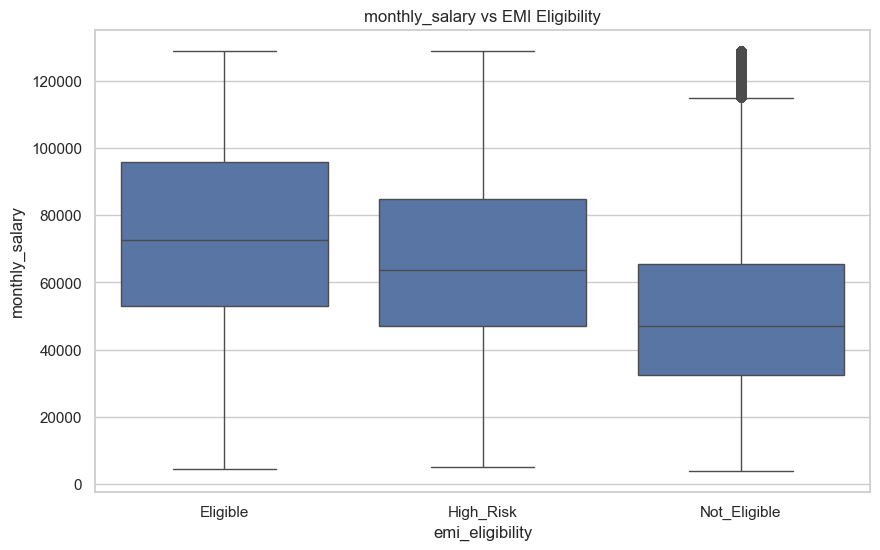

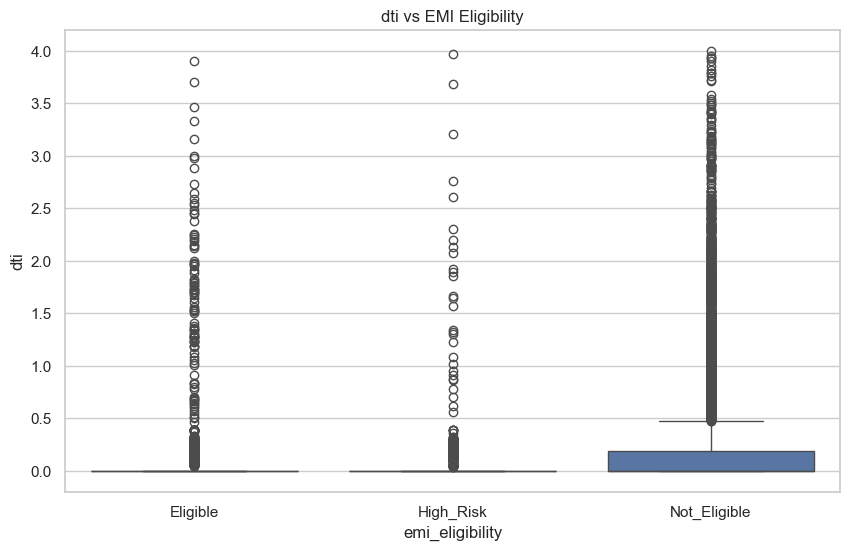

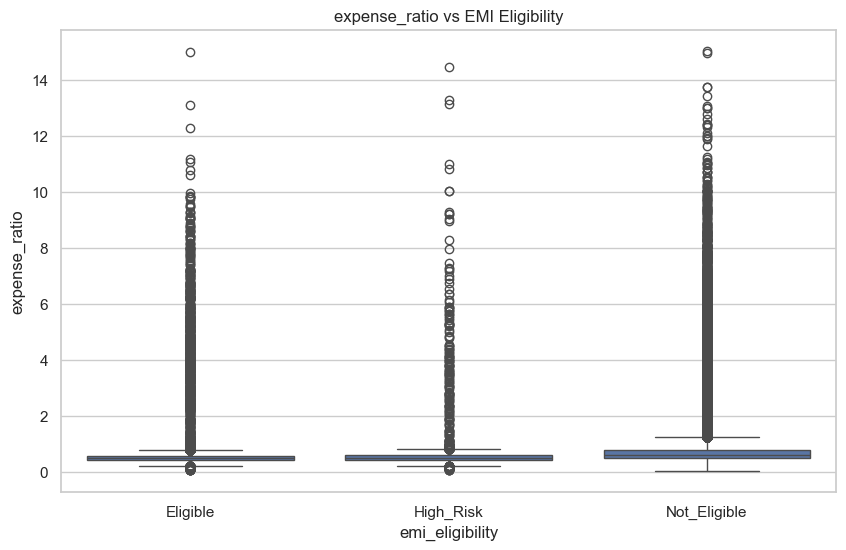

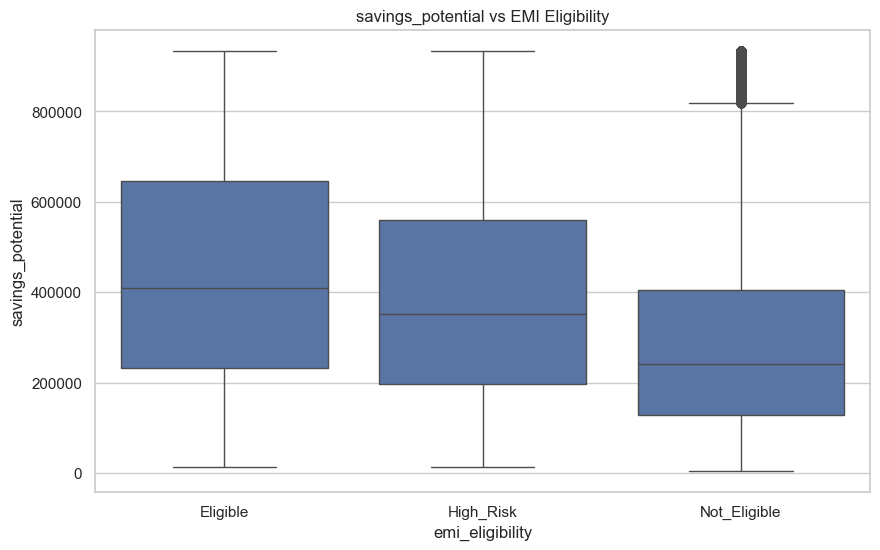

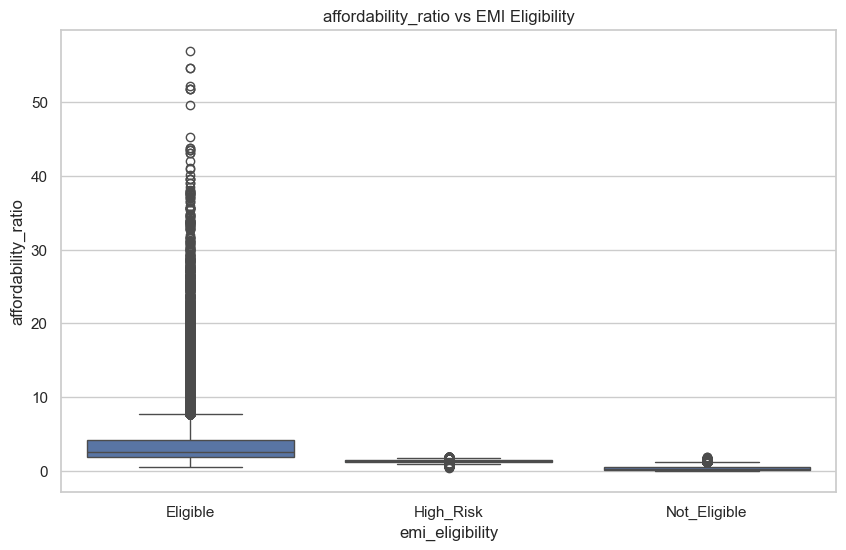

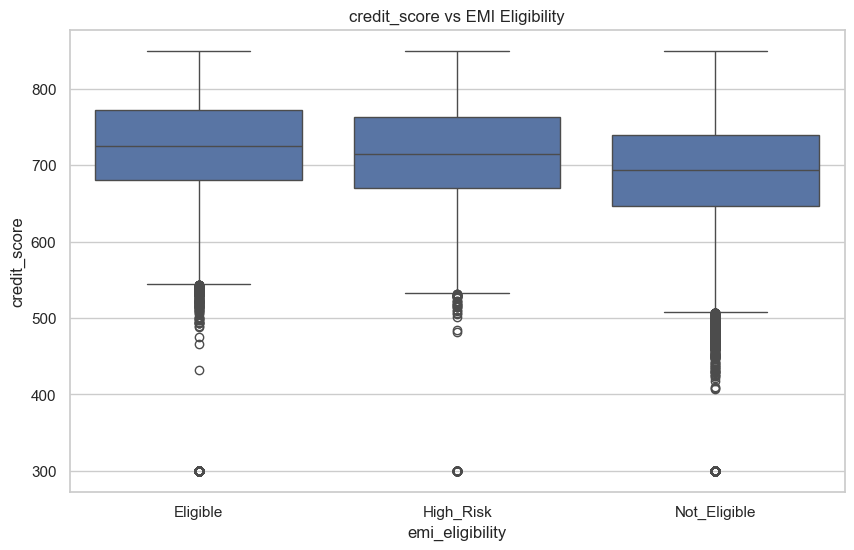

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# -----------------------------
# 1. EMI Eligibility Distribution Across Lending Scenarios
# -----------------------------
sns.countplot(x='emi_scenario', hue='emi_eligibility', data=df)
plt.title("EMI Eligibility Distribution Across Lending Scenarios")
plt.xticks(rotation=45)
plt.show()

# -----------------------------
# 2. Correlation Between Financial Variables and Loan Approval Rates
# -----------------------------
financial_vars = [
    'monthly_salary','dti','expense_ratio','savings_potential',
    'affordability_ratio','credit_score','bank_balance','emergency_fund'
]

corr_matrix = df[financial_vars].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Between Financial Variables")
plt.show()

# -----------------------------
# 3. Demographic Patterns and Risk Factor Relationships
# -----------------------------
demographic_cols = [
    'gender','marital_status','education','employment_type',
    'company_type','house_type','existing_loans'
]

for col in demographic_cols:
    sns.countplot(x=col, hue='emi_eligibility', data=df)
    plt.title(f"EMI Eligibility by {col}")
    plt.xticks(rotation=45)
    plt.show()

# Risk flags
risk_flags = ['credit_risk','employment_stability','salary_missing','balance_missing','fund_missing']

for flag in risk_flags:
    sns.countplot(x=flag, hue='emi_eligibility', data=df)
    plt.title(f"{flag} vs EMI Eligibility")
    plt.show()

# -----------------------------
# 4. Statistical Summaries and Business Insights
# -----------------------------
summary = df.groupby('emi_eligibility')[[
    'monthly_salary','dti','expense_ratio','savings_potential',
    'affordability_ratio','credit_score','bank_balance'
]].describe()

print("📊 Statistical Summary by EMI Eligibility Class:")
print(summary)

# Optional: Boxplots for numeric features
for col in ['monthly_salary','dti','expense_ratio','savings_potential','affordability_ratio','credit_score']:
    sns.boxplot(x='emi_eligibility', y=col, data=df)
    plt.title(f"{col} vs EMI Eligibility")
    plt.show()

feature eng

In [103]:
df["total_expenses"] = (
    df["school_fees"] + df["college_fees"] + df["travel_expenses"] +
    df["groceries_utilities"] + df["other_monthly_expenses"]
)

df["savings_potential"] = df["monthly_salary"] - df["total_expenses"]

df["dti"] = df["current_emi_amount"] / df["monthly_salary"]

df["expense_ratio"] = df["total_expenses"] / df["monthly_salary"]

df["affordability_ratio"] = (df["bank_balance"] + df["emergency_fund"]) / df["requested_amount"]

df["salary_credit_interaction"] = df["monthly_salary"] * df["credit_score"]

df["emi_gap"] = 0
df["balance_emi_gap"] = df["bank_balance"] - df["current_emi_amount"]


In [104]:
df["salary_missing"] = (df["monthly_salary"] == 0).astype(int)
df["balance_missing"] = (df["bank_balance"] == 0).astype(int)
df["fund_missing"] = (df["emergency_fund"] == 0).astype(int)


In [105]:
cat_cols = [
    "gender", "marital_status", "education", "employment_type",
    "company_type", "house_type", "existing_loans", "emi_scenario"
]

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [106]:
print(df_encoded.columns.tolist())


['age', 'monthly_salary', 'years_of_employment', 'monthly_rent', 'family_size', 'dependents', 'school_fees', 'college_fees', 'travel_expenses', 'groceries_utilities', 'other_monthly_expenses', 'current_emi_amount', 'credit_score', 'bank_balance', 'emergency_fund', 'requested_amount', 'requested_tenure', 'emi_eligibility', 'max_monthly_emi', 'total_expenses', 'savings_potential', 'dti', 'expense_ratio', 'affordability_ratio', 'salary_credit_interaction', 'emi_gap', 'balance_emi_gap', 'salary_missing', 'balance_missing', 'fund_missing', 'gender_Male', 'marital_status_Single', 'education_High School', 'education_Post Graduate', 'education_Professional', 'employment_type_Private', 'employment_type_Self-employed', 'company_type_MNC', 'company_type_Mid-size', 'company_type_Small', 'company_type_Startup', 'house_type_Own', 'house_type_Rented', 'existing_loans_Yes', 'emi_scenario_Education EMI', 'emi_scenario_Home Appliances EMI', 'emi_scenario_Personal Loan EMI', 'emi_scenario_Vehicle EMI']


In [107]:
from sklearn.preprocessing import StandardScaler

input_numeric_cols = [
    'monthly_salary','monthly_rent','school_fees','college_fees',
    'travel_expenses','groceries_utilities','other_monthly_expenses',
    'current_emi_amount','credit_score','bank_balance','emergency_fund',
    'requested_amount','requested_tenure',
    'savings_potential','dti','total_expenses','expense_ratio',
    'affordability_ratio','salary_credit_interaction','emi_gap','balance_emi_gap'
]

scaler = StandardScaler()
df_encoded[input_numeric_cols] = scaler.fit_transform(df_encoded[input_numeric_cols])

import joblib
joblib.dump(scaler, "input_scaler.pkl")


['input_scaler.pkl']

In [108]:
X = df_encoded.drop(["emi_eligibility", "max_monthly_emi"], axis=1)

y_class = df_encoded["emi_eligibility"]
y_reg = df_encoded["max_monthly_emi"]


In [111]:
print(X.shape)
print(X.columns.tolist())


(404764, 46)
['age', 'monthly_salary', 'years_of_employment', 'monthly_rent', 'family_size', 'dependents', 'school_fees', 'college_fees', 'travel_expenses', 'groceries_utilities', 'other_monthly_expenses', 'current_emi_amount', 'credit_score', 'bank_balance', 'emergency_fund', 'requested_amount', 'requested_tenure', 'total_expenses', 'savings_potential', 'dti', 'expense_ratio', 'affordability_ratio', 'salary_credit_interaction', 'emi_gap', 'balance_emi_gap', 'salary_missing', 'balance_missing', 'fund_missing', 'gender_Male', 'marital_status_Single', 'education_High School', 'education_Post Graduate', 'education_Professional', 'employment_type_Private', 'employment_type_Self-employed', 'company_type_MNC', 'company_type_Mid-size', 'company_type_Small', 'company_type_Startup', 'house_type_Own', 'house_type_Rented', 'existing_loans_Yes', 'emi_scenario_Education EMI', 'emi_scenario_Home Appliances EMI', 'emi_scenario_Personal Loan EMI', 'emi_scenario_Vehicle EMI']


In [109]:
pd.DataFrame({"feature": X.columns}).to_csv("trained_features.csv", index=False)


In [110]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_class_encoded = le.fit_transform(y_class)

joblib.dump(le, "label_encoder.pkl")


['label_encoder.pkl']

In [113]:
dict(zip(le.classes_, le.transform(le.classes_)))


{'Eligible': np.int64(0),
 'High_Risk': np.int64(1),
 'Not_Eligible': np.int64(2)}

In [114]:
from sklearn.model_selection import train_test_split

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X, y_class_encoded, stratify=y_class_encoded, test_size=0.2, random_state=42
)


In [115]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)


emi_eligibility
Not_Eligible    312846
Eligible         74433
High_Risk        17485
Name: count, dtype: int64


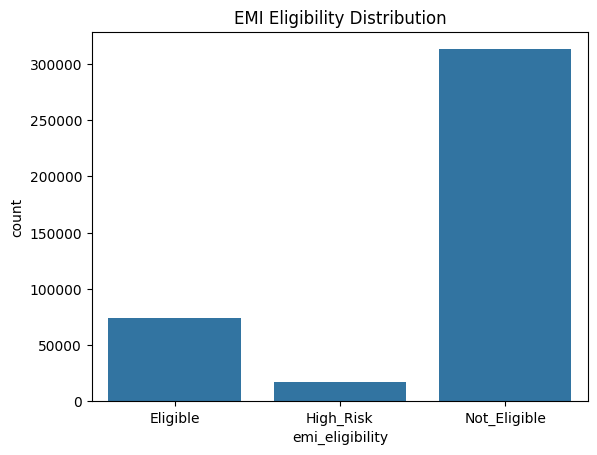

In [117]:
# Distribution of EMI eligibility classes
print(df['emi_eligibility'].value_counts())

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='emi_eligibility', data=df)
plt.title("EMI Eligibility Distribution")
plt.show()

In [118]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_c, y_train_c)


In [119]:
from collections import Counter
print(Counter(y_train_smote))


Counter({np.int64(0): 250277, np.int64(2): 250277, np.int64(1): 250277})


In [116]:
df_encoded.to_csv('emi_prediction_dataset_encoded.csv', index=False)

In [120]:
import pandas as pd

# Convert to Series
y_train_smote_series = pd.Series(y_train_smote)

# Sample consistently
X_train_sample = X_train_smote.sample(100000, random_state=42)
y_train_sample = y_train_smote_series.loc[X_train_sample.index]


In [121]:
import mlflow
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("emi_classification_experiment")


2025/11/29 13:06:54 INFO mlflow.tracking.fluent: Experiment with name 'emi_classification_experiment' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/924749176205125717', creation_time=1764401814956, experiment_id='924749176205125717', last_update_time=1764401814956, lifecycle_stage='active', name='emi_classification_experiment', tags={}>

In [122]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score


In [123]:
with mlflow.start_run(run_name="RandomForest_Classifier"):
    mlflow.set_tag("task", "classification")
    mlflow.set_tag("model_type", "RandomForest")

    rf_clf = RandomForestClassifier(n_estimators=50, random_state=42)
    rf_clf.fit(X_train_sample, y_train_sample)

    y_pred = rf_clf.predict(X_test_c)
    y_pred_proba = rf_clf.predict_proba(X_test_c)

    mlflow.log_param("n_estimators", 50)
    mlflow.log_param("random_state", 42)

    mlflow.log_metric("accuracy", accuracy_score(y_test_c, y_pred))
    mlflow.log_metric("precision", precision_score(y_test_c, y_pred, average="macro"))
    mlflow.log_metric("recall", recall_score(y_test_c, y_pred, average="macro"))
    mlflow.log_metric("f1_score", f1_score(y_test_c, y_pred, average="macro"))
    mlflow.log_metric("roc_auc", roc_auc_score(y_test_c, y_pred_proba, multi_class="ovr", average="macro"))

    mlflow.sklearn.log_model(rf_clf, "RandomForest_Classifier")


2025/11/29 13:08:02 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/29 13:08:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForest_Classifier at: http://127.0.0.1:5000/#/experiments/924749176205125717/runs/c3930aaa39e14e33bc6029cb78a258a3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/924749176205125717


In [124]:
with mlflow.start_run(run_name="XGBoost_Classifier"):
    mlflow.set_tag("task", "classification")
    mlflow.set_tag("model_type", "XGBoost")

    xgb_clf = XGBClassifier(random_state=42, eval_metric="mlogloss")
    xgb_clf.fit(X_train_smote, y_train_smote)

    y_pred = xgb_clf.predict(X_test_c)
    y_pred_proba = xgb_clf.predict_proba(X_test_c)

    mlflow.log_param("random_state", 42)
    mlflow.log_param("eval_metric", "mlogloss")

    mlflow.log_metric("accuracy", accuracy_score(y_test_c, y_pred))
    mlflow.log_metric("precision", precision_score(y_test_c, y_pred, average="macro"))
    mlflow.log_metric("recall", recall_score(y_test_c, y_pred, average="macro"))
    mlflow.log_metric("f1_score", f1_score(y_test_c, y_pred, average="macro"))
    mlflow.log_metric("roc_auc", roc_auc_score(y_test_c, y_pred_proba, multi_class="ovr", average="macro"))

    mlflow.xgboost.log_model(xgb_clf, "XGBoost_Classifier")


2025/11/29 13:08:55 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/29 13:09:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGBoost_Classifier at: http://127.0.0.1:5000/#/experiments/924749176205125717/runs/2ae9c3a7a0684d759c7503969cdfddf6
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/924749176205125717


In [125]:
with mlflow.start_run(run_name="GradientBoosting_Classifier"):
    mlflow.set_tag("task", "classification")
    mlflow.set_tag("model_type", "GradientBoosting")

    gb_clf = GradientBoostingClassifier(
        n_estimators=30,
        max_depth=3,
        subsample=0.8,
        random_state=42
    )

    gb_clf.fit(X_train_sample, y_train_sample)

    y_pred = gb_clf.predict(X_test_c)
    y_pred_proba = gb_clf.predict_proba(X_test_c)

    mlflow.log_param("n_estimators", 30)
    mlflow.log_param("max_depth", 3)
    mlflow.log_param("subsample", 0.8)
    mlflow.log_param("random_state", 42)

    mlflow.log_metric("accuracy", accuracy_score(y_test_c, y_pred))
    mlflow.log_metric("precision", precision_score(y_test_c, y_pred, average="macro"))
    mlflow.log_metric("recall", recall_score(y_test_c, y_pred, average="macro"))
    mlflow.log_metric("f1_score", f1_score(y_test_c, y_pred, average="macro"))
    mlflow.log_metric("roc_auc", roc_auc_score(y_test_c, y_pred_proba, multi_class="ovr", average="macro"))

    mlflow.sklearn.log_model(gb_clf, "GradientBoosting_Classifier")


2025/11/29 13:10:11 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/29 13:10:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoosting_Classifier at: http://127.0.0.1:5000/#/experiments/924749176205125717/runs/d2af0783a6114bc4b3c43bba6af83623
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/924749176205125717


In [126]:
import numpy as np

idx = np.random.choice(len(y_train_r), size=50000, replace=False)

X_train_sample = X_train_r.iloc[idx]   # select rows by position
y_train_sample = y_train_r.iloc[idx]   # works if y_train_r is a Series

In [127]:
import numpy as np
import pandas as pd
import mlflow
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [128]:

# -----------------------------
# REGRESSION EXPERIMENT
# -----------------------------
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("emi_regression_experiment")

# Random Forest Regressor
with mlflow.start_run(run_name="RandomForest_Regressor"):
    mlflow.set_tag("task", "regression")
    mlflow.set_tag("model_type", "RandomForest")

    rf_reg = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
    rf_reg.fit(X_train_sample, y_train_sample)
    y_pred = rf_reg.predict(X_test_r)

    mse = mean_squared_error(y_test_r, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_r, y_pred)
    r2 = r2_score(y_test_r, y_pred)
    mape = np.mean(np.abs((y_test_r - y_pred) / y_test_r)) * 100
    mlflow.log_param("n_estimators", 50)
    mlflow.log_param("max_depth", 10)
    mlflow.log_param('random_state', 42)
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("r2", r2)
    mlflow.log_metric("mape", mape)

    mlflow.sklearn.log_model(rf_reg, "RandomForest_Regressor")


2025/11/29 13:15:28 INFO mlflow.tracking.fluent: Experiment with name 'emi_regression_experiment' does not exist. Creating a new experiment.
2025/11/29 13:15:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/29 13:16:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForest_Regressor at: http://127.0.0.1:5000/#/experiments/779327931942531374/runs/c78e96a982324fa095648704dfa360b3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/779327931942531374


In [129]:

# XGBoost Regressor
with mlflow.start_run(run_name="XGBoost_Regressor"):
    mlflow.set_tag("task", "regression")
    mlflow.set_tag("model_type", "XGBoost")

    xgb_reg = XGBRegressor(random_state=42)
    xgb_reg.fit(X_train_r, y_train_r)
    y_pred = xgb_reg.predict(X_test_r)

    mse = mean_squared_error(y_test_r, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_r, y_pred)
    r2 = r2_score(y_test_r, y_pred)
    mape = np.mean(np.abs((y_test_r - y_pred) / y_test_r)) * 100

    mlflow.log_metric("mse", mse)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("r2", r2)
    mlflow.log_metric("mape", mape)

    mlflow.xgboost.log_model(xgb_reg, "XGBoost_Regressor")



2025/11/29 13:22:54 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/29 13:23:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGBoost_Regressor at: http://127.0.0.1:5000/#/experiments/779327931942531374/runs/729f90a441254754ada71b3b66d64745
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/779327931942531374


In [130]:
# Gradient Boosting Regressor
with mlflow.start_run(run_name="GradientBoosting_Regressor"):
    mlflow.set_tag("task", "regression")
    mlflow.set_tag("model_type", "GradientBoosting")

    gb_reg = GradientBoostingRegressor(random_state=42)
    gb_reg.fit(X_train_sample, y_train_sample)
    y_pred = gb_reg.predict(X_test_r)

    mse = mean_squared_error(y_test_r, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_r, y_pred)
    r2 = r2_score(y_test_r, y_pred)
    mape = np.mean(np.abs((y_test_r - y_pred) / y_test_r)) * 100

    mlflow.log_metric("mse", mse)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("r2", r2)
    mlflow.log_metric("mape", mape)

    mlflow.sklearn.log_model(gb_reg, "GradientBoosting_Regressor")

2025/11/29 13:23:27 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/29 13:23:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoosting_Regressor at: http://127.0.0.1:5000/#/experiments/779327931942531374/runs/ae40d4ea9c9b43ebb7768866995734dc
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/779327931942531374


In [131]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("emi_classification_experiment")

<Experiment: artifact_location='mlflow-artifacts:/924749176205125717', creation_time=1764401814956, experiment_id='924749176205125717', last_update_time=1764401814956, lifecycle_stage='active', name='emi_classification_experiment', tags={}>

In [133]:
run_id ='2ae9c3a7a0684d759c7503969cdfddf6'
result = mlflow.register_model(
    model_uri=f"runs:/{run_id}/XGBoost_Classifier",
    name="XGBoost_Classifier"
)

Successfully registered model 'XGBoost_Classifier'.
2025/11/29 13:25:17 WARNING mlflow.tracking._model_registry.fluent: Run with id 2ae9c3a7a0684d759c7503969cdfddf6 has no artifacts at artifact path 'XGBoost_Classifier', registering model based on models:/m-eca40b7e777b4d6e90c8b932547a17d6 instead
2025/11/29 13:25:18 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBoost_Classifier, version 1
Created version '1' of model 'XGBoost_Classifier'.


In [134]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("emi_regression_experiment")

<Experiment: artifact_location='mlflow-artifacts:/779327931942531374', creation_time=1764402328247, experiment_id='779327931942531374', last_update_time=1764402328247, lifecycle_stage='active', name='emi_regression_experiment', tags={}>

In [135]:
run_id ='729f90a441254754ada71b3b66d64745'
result = mlflow.register_model(
    model_uri=f"runs:/{run_id}/XGBoost_Regressor",
    name="XGBoost_Regressor"
)

Successfully registered model 'XGBoost_Regressor'.
2025/11/29 13:26:26 WARNING mlflow.tracking._model_registry.fluent: Run with id 729f90a441254754ada71b3b66d64745 has no artifacts at artifact path 'XGBoost_Regressor', registering model based on models:/m-55b8bd1e138141f18d7b10d87989c3b3 instead
2025/11/29 13:26:26 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBoost_Regressor, version 1
Created version '1' of model 'XGBoost_Regressor'.


In [136]:
from mlflow.tracking import MlflowClient

client = MlflowClient()

# Example: move version 1 of XGBoost_Classifier to Production
client.transition_model_version_stage(
    name="XGBoost_Classifier",
    version=1,
    stage="Production"
)

C:\Users\Tasneem Inayath\AppData\Local\Temp\ipykernel_12760\1815614486.py:6: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(


<ModelVersion: aliases=[], creation_timestamp=1764402917939, current_stage='Production', deployment_job_state=<ModelVersionDeploymentJobState: current_task_name='', job_id='', job_state='DEPLOYMENT_JOB_CONNECTION_STATE_UNSPECIFIED', run_id='', run_state='DEPLOYMENT_JOB_RUN_STATE_UNSPECIFIED'>, description='', last_updated_timestamp=1764403000972, metrics=None, model_id=None, name='XGBoost_Classifier', params=None, run_id='2ae9c3a7a0684d759c7503969cdfddf6', run_link='', source='models:/m-eca40b7e777b4d6e90c8b932547a17d6', status='READY', status_message=None, tags={}, user_id='', version='1'>

In [137]:
from mlflow.tracking import MlflowClient

client = MlflowClient()

# Example: move version 1 of XGBoost_Regressor to Production
client.transition_model_version_stage(
    name="XGBoost_Regressor",
    version=1,
    stage="Production"
)

C:\Users\Tasneem Inayath\AppData\Local\Temp\ipykernel_12760\2839353733.py:6: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(


<ModelVersion: aliases=[], creation_timestamp=1764402986769, current_stage='Production', deployment_job_state=<ModelVersionDeploymentJobState: current_task_name='', job_id='', job_state='DEPLOYMENT_JOB_CONNECTION_STATE_UNSPECIFIED', run_id='', run_state='DEPLOYMENT_JOB_RUN_STATE_UNSPECIFIED'>, description='', last_updated_timestamp=1764403005733, metrics=None, model_id=None, name='XGBoost_Regressor', params=None, run_id='729f90a441254754ada71b3b66d64745', run_link='', source='models:/m-55b8bd1e138141f18d7b10d87989c3b3', status='READY', status_message=None, tags={}, user_id='', version='1'>

In [138]:
import joblib
le = joblib.load("label_encoder.pkl")
print(list(zip(le.classes_, le.transform(le.classes_))))


[('Eligible', np.int64(0)), ('High_Risk', np.int64(1)), ('Not_Eligible', np.int64(2))]


In [ ]:
import pandas as pd
import joblib

# Load your saved features
trained_features = pd.read_csv("trained_features.csv")['feature'].tolist()

# Collect user input (example dict)
user_input = {
    'age': 30,
    'monthly_salary': 50000,
    'years_of_employment': 5,
    'monthly_rent': 10000,
    'family_size': 4,
    'dependents': 2,
    'school_fees': 5000,
    'college_fees': 0,
    'travel_expenses': 2000,
    'groceries_utilities': 10000,
    'other_monthly_expenses': 3000,
    'current_emi_amount': 5000,
    'credit_score': 750,
    'bank_balance': 20000,
    'emergency_fund': 50000,
    'requested_amount': 100000,
    'requested_tenure': 12,
    'gender_Male': 1,
    'marital_status_Single': 0,
    'education_Graduate': 1,
    'education_High School': 0,
    'education_Post Graduate': 0,
    'education_Professional': 0,
    'employment_type_Private': 1,
    'employment_type_Self-employed': 0,
    'company_type_MNC': 0,
    'company_type_Mid-size': 0,
    'company_type_Small': 0,
    'company_type_Startup': 0,
    'house_type_Own': 1,
    'house_type_Rented': 0,
    'existing_loans_Yes': 0,
    'emi_scenario_Education EMI': 0,
    'emi_scenario_Home Appliances EMI': 0,
    'emi_scenario_Personal Loan EMI': 0,
    'emi_scenario_Vehicle EMI': 0,
    # Include all other numeric engineered features if any
}

# Convert to DataFrame
features_df = pd.DataFrame([user_input])

# Reorder columns exactly as training
features_df = features_df[trained_features]

# Load the model
import mlflow.pyfunc
classification_model = mlflow.pyfunc.load_model("models:/XGBoost_Classifier/Production")

# Predict class
pred_class = classification_model.predict(features_df)
print("Predicted class:", pred_class)


EMI Eligibility: Not_Eligible
Max EMI Amount: ₹4,256.32


In [146]:
import pandas as pd
import numpy as np
import mlflow.pyfunc
import joblib

# ------------------------
# Load trained artifacts
# ------------------------
trained_features = pd.read_csv("trained_features.csv")["feature"].tolist()
scaler = joblib.load("input_scaler.pkl")
label_encoder = joblib.load("label_encoder.pkl")

# ------------------------
# Load MLflow models
# ------------------------
mlflow.set_tracking_uri("http://127.0.0.1:5000")

classification_model = mlflow.pyfunc.load_model("models:/XGBoost_Classifier/Production")
regression_model = mlflow.pyfunc.load_model("models:/XGBoost_Regressor/Production")

# ------------------------
# Helper function: compute features
# ------------------------
def compute_features(user_input: dict):
    features = user_input.copy()

    # Total expenses
    total_expenses = (features.get("school_fees", 0) + features.get("college_fees", 0) +
                      features.get("travel_expenses", 0) + features.get("groceries_utilities", 0) +
                      features.get("other_monthly_expenses", 0) + features.get("monthly_rent", 0))
    features["total_expenses"] = total_expenses
    features["savings_potential"] = features.get("monthly_salary", 0) - total_expenses

    features["dti"] = (features.get("current_emi_amount", 0) / features.get("monthly_salary", 1))
    features["expense_ratio"] = (total_expenses / features.get("monthly_salary", 1))
    features["affordability_ratio"] = ((features.get("bank_balance", 0) + features.get("emergency_fund", 0)) 
                                       / max(features.get("requested_amount", 1), 1))
    features["salary_credit_interaction"] = features.get("monthly_salary", 0) * features.get("credit_score", 0)
    features["emi_gap"] = 0 - features.get("current_emi_amount", 0)
    features["balance_emi_gap"] = features.get("bank_balance", 0) - features.get("current_emi_amount", 0)

    # Missing flags
    features["salary_missing"] = int(features.get("monthly_salary", 0) == 0)
    features["balance_missing"] = int(features.get("bank_balance", 0) == 0)
    features["fund_missing"] = int(features.get("emergency_fund", 0) == 0)

    # One-hot encoding for categorical variables (example)
    categorical_map = {
        "gender": ["Male"],
        "marital_status": ["Single"],
        "education": ["High School", "Post Graduate", "Professional"],
        "employment_type": ["Private", "Self-employed"],
        "company_type": ["MNC", "Mid-size", "Small", "Startup"],
        "house_type": ["Own", "Rented"],
        "existing_loans": ["Yes"],
        "emi_scenario": ["Education EMI", "Home Appliances EMI", "Personal Loan EMI", "Vehicle EMI"]
    }

    for cat_col, cat_values in categorical_map.items():
        for val in cat_values:
            features[f"{cat_col}_{val}"] = int(features.get(cat_col, "") == val)

    return features

# ------------------------
# Example user input
# ------------------------
user_input= {
    "age": 40,
    "monthly_salary": 15000,        # low salary
    "monthly_rent": 8000,
    "school_fees": 5000,
    "college_fees": 2000,
    "travel_expenses": 3000,
    "groceries_utilities": 7000,
    "other_monthly_expenses": 3000,
    "current_emi_amount": 8000,     # high existing EMI
    "credit_score": 400,             # poor credit score
    "bank_balance": 2000,            # low balance
    "emergency_fund": 1000,          # very low
    "requested_amount": 100000,
    "requested_tenure": 36,
    "gender": "Male",
    "marital_status": "Married",
    "education": "High School",
    "employment_type": "Self-employed",
    "company_type": "Small",
    "house_type": "Rented",
    "existing_loans": "Yes",
    "emi_scenario": "Personal Loan EMI"
}

# ------------------------
# Compute features
# ------------------------
features = compute_features(user_input)

# Convert to DataFrame and reorder columns
features_df = pd.DataFrame([features])
features_df = features_df.reindex(columns=trained_features, fill_value=0)

# Scale numeric features
numeric_cols = [
    'monthly_salary','monthly_rent','school_fees','college_fees','travel_expenses',
    'groceries_utilities','other_monthly_expenses','current_emi_amount','credit_score',
    'bank_balance','emergency_fund','requested_amount','requested_tenure','savings_potential',
    'dti','total_expenses','expense_ratio','affordability_ratio','salary_credit_interaction',
    'emi_gap','balance_emi_gap'
]
features_df[numeric_cols] = scaler.transform(features_df[numeric_cols])

# ------------------------
# Make predictions
# ------------------------
pred_class_encoded = classification_model.predict(features_df)
pred_class = label_encoder.inverse_transform(pred_class_encoded)
pred_emi = regression_model.predict(features_df)

print(f"EMI Eligibility: {pred_class[0]}")
print(f"Max EMI Amount: ₹{pred_emi[0]:,.2f}")


EMI Eligibility: Not_Eligible
Max EMI Amount: ₹467.12


In [148]:
import mlflow.xgboost
from xgboost import XGBClassifier

# Load directly as XGBoost model from MLflow
model_uri = "models:/XGBoost_Classifier/Production"
classification_model = mlflow.xgboost.load_model(model_uri)

# Predict probabilities
probs = classification_model.predict_proba(features_df)
pred_idx = probs.argmax(axis=1)[0]
pred_class = classification_model.classes_[pred_idx]

print("Class probabilities:", probs)
print("Predicted class:", pred_class)


Class probabilities: [[1.2110188e-04 1.7619641e-03 9.9811697e-01]]
Predicted class: 2


In [149]:
df[df["emi_eligibility"] == "High_Risk"].sample(5)


,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,savings_potential,dti,expense_ratio,affordability_ratio,salary_credit_interaction,emi_gap,balance_emi_gap,salary_missing,balance_missing,fund_missing
374014,38.0,Female,Married,Post Graduate,84700.0,Private,4.1,Large Indian,Rented,13000.0,...,45200.0,0.0,0.466352,0.423191,61407500.0,0,185000.0,0,0,0
69189,38.0,Male,Married,Graduate,87900.0,Government,4.5,Large Indian,Own,0.0,...,42300.0,0.0,0.518771,2.313383,74715000.0,0,433600.0,0,0,0
14973,38.0,Male,Married,High School,31000.0,Private,16.0,MNC,Family,0.0,...,5500.0,0.0,0.822581,1.201299,23033000.0,0,64700.0,0,0,0
120626,48.0,Female,Married,Professional,68500.0,Government,0.9,Startup,Rented,23400.0,...,40900.0,0.0,0.402920,3.369231,51169500.0,0,285800.0,0,0,0
400403,27.0,Male,Single,Post Graduate,42600.0,Government,3.2,Mid-size,Rented,13900.0,...,21500.0,0.0,0.495305,2.734513,32887200.0,0,255000.0,0,0,0


In [152]:
df.to_csv('emi_prediction_dataset_final_enhanced.csv', index=False)

In [153]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 404764 entries, 0 to 404799
Data columns (total 38 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   age                        404764 non-null  float64 
 1   gender                     404764 non-null  object  
 2   marital_status             404764 non-null  category
 3   education                  404764 non-null  category
 4   monthly_salary             404764 non-null  float64 
 5   employment_type            404764 non-null  category
 6   years_of_employment        404764 non-null  float64 
 7   company_type               404764 non-null  category
 8   house_type                 404764 non-null  category
 9   monthly_rent               404764 non-null  float64 
 10  family_size                404764 non-null  int64   
 11  dependents                 404764 non-null  int64   
 12  school_fees                404764 non-null  float64 
 13  college_fees       

In [151]:
import pandas as pd
row =df[df["emi_eligibility"] == "High_Risk"]
# Select one row (example: take first row)
single_row = row.iloc[0]

# Convert to vertical format (feature | value)
vertical_view = single_row.to_frame(name="Value")
vertical_view.index.name = "Feature"

# Display nicely
vertical_view.reset_index()


,Feature,Value
0,age,38.0
1,gender,Male
2,marital_status,Married
3,education,Post Graduate
4,monthly_salary,57800.0
5,employment_type,Government
6,years_of_employment,11.3
7,company_type,MNC
8,house_type,Rented
9,monthly_rent,9500.0
